In [3]:
import numpy as np
import matplotlib.pyplot as plt

data= open('/home/dwkang/Projects/KPS_tuto/data/pp2tt2l_1k.lhe').readlines()

LHEF Data 

In [2]:
data[537:552]

['<event>\n',
 '12      1 +2.2746200e+01 1.81299400e+02 7.54677100e-03 1.16702700e-01\n',
 '       21 -1    0    0  501  502 +0.0000000000e+00 +0.0000000000e+00 +1.2857255432e+02 1.2857255432e+02 0.0000000000e+00 0.0000e+00 1.0000e+00\n',
 '       21 -1    0    0  502  503 -0.0000000000e+00 -0.0000000000e+00 -2.5649194857e+02 2.5649194857e+02 0.0000000000e+00 0.0000e+00 1.0000e+00\n',
 '        6  2    1    2  501    0 -2.3247808926e+01 +4.3685554130e+01 -8.6470130692e+01 1.9908734890e+02 1.7236531185e+02 0.0000e+00 0.0000e+00\n',
 '       24  2    3    3    0    0 -2.8418035897e+01 -6.1668373920e+00 +1.4215179715e+01 8.6519085522e+01 8.0236314581e+01 0.0000e+00 0.0000e+00\n',
 '       -6  2    1    2    0  503 +2.3247808926e+01 -4.3685554130e+01 -4.1449263555e+01 1.8597715400e+02 1.7441494231e+02 0.0000e+00 0.0000e+00\n',
 '      -24  2    5    5    0    0 +7.1185430375e+01 +6.9885947147e+00 -3.0369423822e-01 1.0485420542e+02 7.6668808590e+01 0.0000e+00 0.0000e+00\n',
 '        5  1  

Extract data from LHE file

In [4]:
import numpy as np
from lhereader import LHEReader

# Specify the LHE file path
# reader = LHEReader('/home/dwkang/Projects/KPS_tuto/data/pp2tt2l_1k.lhe')
reader = LHEReader('/home/dwkang/Projects/KPS_tuto/data/pp2tt2l_10k.lhe')

# Initialize empty lists for each particle type
b1=[]
b2=[]
l1=[]
l2=[]
nu1=[]
nu2=[]

# Extract particle information from LHE file
for iev, event, in enumerate(reader):    
    for ipt, particle in enumerate(event.particles):
        if particle.pdgid==5:
            b1.append(particle.p4())
        if particle.pdgid==-11 or particle.pdgid==-13:
            l1.append(particle.p4())
        if particle.pdgid==12 or particle.pdgid==14:
            nu1.append(particle.p4())
        if particle.pdgid==-5:
            b2.append(particle.p4())
        if particle.pdgid==11 or particle.pdgid==13:
            l2.append(particle.p4())
        if particle.pdgid==-12 or particle.pdgid==-14:
            nu2.append(particle.p4())

# Convert lists to NumPy arrays
b1=np.array(b1)
l1=np.array(l1)
nu1=np.array(nu1)
b2=np.array(b2)
l2=np.array(l2)
nu2=np.array(nu2)

Show Data

In [164]:
b1

array([[  61.16082318,  -59.26321746, -161.32299395,  182.48280361],
       [  26.70895075,   12.40860594,    4.78501399,   30.20476635],
       [ -90.00850974,  -10.48917246, -145.83240719,  171.75778163],
       ...,
       [ -41.72970797,   63.98091232,   11.61109914,   77.4069331 ],
       [  15.78066518,  -47.96655731,  -24.95950796,   56.52333192],
       [ -59.59205698,   74.48095613,  -34.46936586,  101.53252318]])

In [5]:
def mass_numpy(p, ax=1):
    # Calculate the mass of particles from their 4-momenta.
    return np.sqrt(-p[:,0]**2 - p[:,1]**2 - p[:,2]**2 + p[:,3]**2)

def pt_numpy(p, ax=1):
    # Calculate the transverse momentum (pt) of particles from their 4-momenta.
    return np.sqrt(p[:,0]**2 + p[0:,1]**2)

def angle(v1, v2, ax=1):
    # Calculate the angle between two vectors.
    n1 = np.sqrt(v1[:,0]*v1[:,0]+v1[:,1]*v1[:,1]+v1[:,2]*v1[:,2])
    n2 = np.sqrt(v2[:,0]*v2[:,0]+v2[:,1]*v2[:,1]+v2[:,2]*v2[:,2])
    res = v1[:,0]*v2[:,0]+v1[:,1]*v2[:,1]+v1[:,2]*v2[:,2]
    return res/n1/n2

In [168]:
print(mass_numpy(b1))
print(pt_numpy(b1))
print(angle(b1,l1))

[4.69999996 4.7        4.69999994 ... 4.70000001 4.7        4.69999992]
[85.16322702 29.45066301 90.61762833 ... 76.38668516 50.49574253
 95.38671858]
[ 0.92053715  0.14590156  0.91656368 ... -0.88485861 -0.50437394
  0.62894358]


Draw Histograms

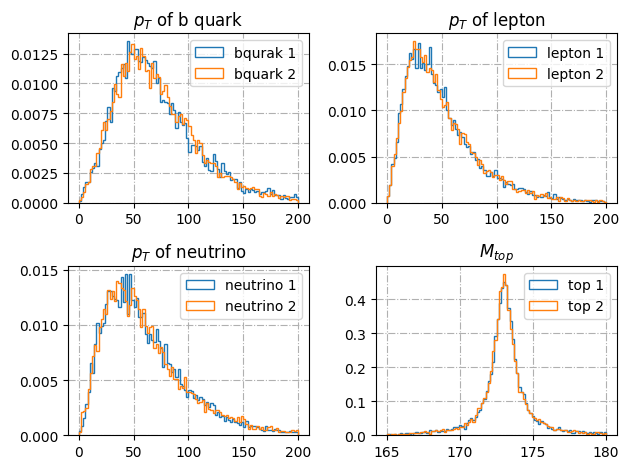

In [6]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(pt_numpy(b1), bins=100, histtype='step', density=True, range=[0,200], label='bqurak 1')
ax[0,0].hist(pt_numpy(b2), bins=100, histtype='step', density=True, range=[0,200], label='bquark 2')
ax[0,0].grid(True, linestyle='-.')
ax[0,0].set_title('$p_{T}$ of b quark')
ax[0,0].legend()

ax[0,1].hist(pt_numpy(l1), bins=100, histtype='step', density=True, range=[0,200], label='lepton 1')
ax[0,1].hist(pt_numpy(l2), bins=100, histtype='step', density=True, range=[0,200], label='lepton 2')
ax[0,1].grid(True, linestyle='-.')
ax[0,1].set_title('$p_{T}$ of lepton')
ax[0,1].legend()

ax[1,0].hist(pt_numpy(nu1), bins=100, histtype='step', density=True, range=[0,200], label='neutrino 1')
ax[1,0].hist(pt_numpy(nu2), bins=100, histtype='step', density=True, range=[0,200], label='neutrino 2')
ax[1,0].grid(True, linestyle='-.')
ax[1,0].set_title('$p_{T}$ of neutrino')
ax[1,0].legend()

ax[1,1].hist(mass_numpy(b1+l1+nu1), bins=100, histtype='step', density=True, range=[165,180], label='top 1')
ax[1,1].hist(mass_numpy(b2+l2+nu2), bins=100, histtype='step', density=True, range=[165,180], label='top 2')
ax[1,1].grid(True, linestyle='-.')
ax[1,1].set_title('$M_{top}$')
ax[1,1].legend()

fig.tight_layout()
plt.show()

Do cut on the histogram

20000
18542
13497
4138


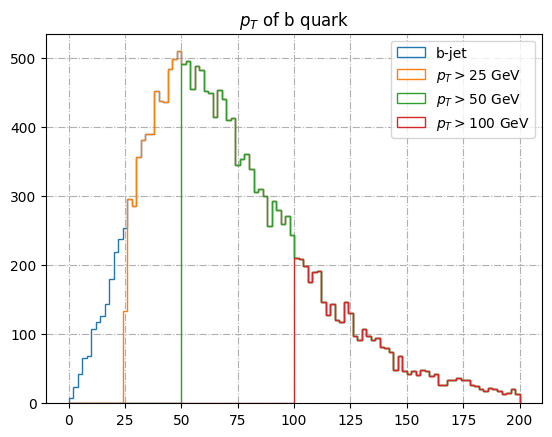

In [7]:
pt_bjet = np.concatenate((pt_numpy(b1),pt_numpy(b2)))

fig, ax = plt.subplots()
ax.hist(pt_bjet, bins=100, histtype='step', density=False, range=[0,200], label='b-jet')
ax.hist(pt_bjet[pt_bjet>25], bins=100, histtype='step', density=False, range=[0,200], label='$p_{T} > 25$ GeV')
ax.hist(pt_bjet[pt_bjet>50], bins=100, histtype='step', density=False, range=[0,200], label='$p_{T} > 50$ GeV')
ax.hist(pt_bjet[pt_bjet>100], bins=100, histtype='step', density=False, range=[0,200], label='$p_{T} > 100$ GeV')
ax.grid(True, linestyle='-.')
ax.set_title('$p_{T}$ of b quark')
ax.legend()
fig.show()

print(len(pt_bjet))
print(len(pt_bjet[pt_bjet>25]))
print(len(pt_bjet[pt_bjet>50]))
print(len(pt_bjet[pt_bjet>100]))

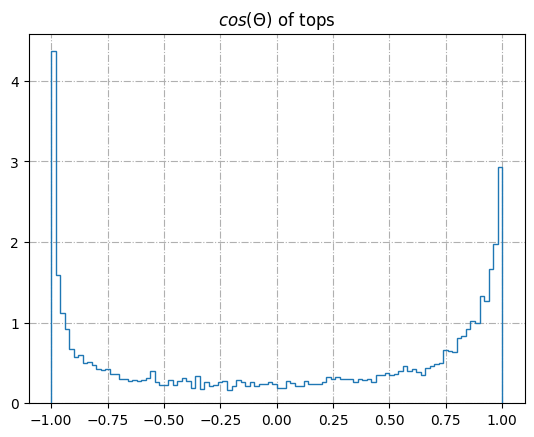

In [8]:
fig, ax = plt.subplots()
ax.hist(angle(b1+l1+nu1,b2+l2+nu2), bins=100, histtype='step', density=True, range=[-1,1])
ax.grid(True, linestyle='-.')
ax.set_title('$cos(\Theta)$ of tops')
plt.show()

Invariant mass and Angle between b-quark and lepton 

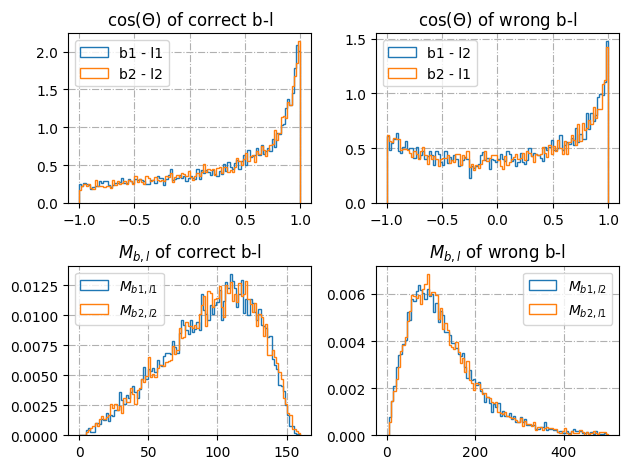

In [9]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(angle(b1,l1), bins=100, histtype='step', density=True, range=[-1,1], label='b1 - l1')
ax[0,0].hist(angle(b2,l2), bins=100, histtype='step', density=True, range=[-1,1], label='b2 - l2')
ax[0,0].grid(True, linestyle='-.')
ax[0,0].set_title('$\cos(\Theta)$ of correct b-l')
ax[0,0].legend()

ax[0,1].hist(angle(b1,l2), bins=100, histtype='step', density=True, range=[-1,1], label='b1 - l2')
ax[0,1].hist(angle(b2,l1), bins=100, histtype='step', density=True, range=[-1,1], label='b2 - l1')
ax[0,1].grid(True, linestyle='-.')
ax[0,1].set_title('$\cos(\Theta)$ of wrong b-l')
ax[0,1].legend()

ax[1,0].hist(mass_numpy(b1+l1), bins=100, histtype='step', density=True, range=[0,160], label='$M_{b1,l1}$')
ax[1,0].hist(mass_numpy(b2+l2), bins=100, histtype='step', density=True, range=[0,160], label='$M_{b2,l2}$')
ax[1,0].grid(True, linestyle='-.')
ax[1,0].set_title('$M_{b,l}$ of correct b-l')
ax[1,0].legend()

ax[1,1].hist(mass_numpy(b1+l2), bins=100, histtype='step', density=True, range=[0,500], label='$M_{b1,l2}$')
ax[1,1].hist(mass_numpy(b2+l1), bins=100, histtype='step', density=True, range=[0,500], label='$M_{b2,l1}$')
ax[1,1].grid(True, linestyle='-.')
ax[1,1].set_title('$M_{b,l}$ of wrong b-l')
ax[1,1].legend()

fig.tight_layout()
plt.show()

$$(M_{bl}^{max})^2 = \frac{(M_t^2 - M_W^2)(M_W^2 - M_{\nu}^2)}{M_W^2}\\
M_{bl}^{max} = \sqrt{173^2 - 80^2} = 153.39
$$

In [108]:
np.sqrt((173**2-80**2)())

153.39165557487146

MT2 Calculation
$$
M_{T2} \equiv \min_{\bold{k}_{1T}, \bold{k}_{2T} \in \mathbb{R}^2} \left[ \max \left\{M_{1T}(p_{1T}, k_{1T}, M_{\chi}),M_{2T}(p_{2T}, k_{2T}, M_{\chi}) \right\} \right]\\
\text{subject to}\,\, \bold{k}_{1T} + \bold{k}_{2T} = \bold{P}_{T}^{miss}
$$

In [10]:
from mt2 import mt2
?mt2

Signature:
mt2(
    m_vis_1: Union[float, numpy.ndarray],
    px_vis_1: Union[float, numpy.ndarray],
    py_vis_1: Union[float, numpy.ndarray],
    m_vis_2: Union[float, numpy.ndarray],
    px_vis_2: Union[float, numpy.ndarray],
    py_vis_2: Union[float, numpy.ndarray],
    px_miss: Union[float, numpy.ndarray],
    py_miss: Union[float, numpy.ndarray],
    m_invis_1: Union[float, numpy.ndarray],
    m_invis_2: Union[float, numpy.ndarray],
    desired_precision_on_mt2: Union[float, numpy.ndarray] = 0.0,
    *,
    out: Optional[numpy.ndarray] = None,
) -> Union[float, numpy.ndarray]
Docstring:
Returns asymmetric mT2 (which is >=0), or a negative value if no solution exists.

We broadcast over any arguments that are provided, following standard numpy
conventions.

If more flexibility is required, note that the underlying mt2_ufunc can be used
directly, which specifies additional arguments (like `where`) in keeping with other
numpy ufuncs.

Args:
    m_vis_1: Mass of visible particle 1
 

In [15]:
from mt2 import mt2

mt2_tt = mt2( mass_numpy(b1+l1), b1[:,0]+l1[:,0], b1[:,1]+l1[:,1],
              mass_numpy(b2+l2), b2[:,0]+l2[:,0], b2[:,1]+l2[:,1],
              nu1[:,0]+nu2[:,0], nu1[:,1]+nu2[:,1],
              0, 0)

mt2_ll = mt2( 0, l1[:,0], l1[:,1],
              0, l2[:,0], l2[:,1],
              nu1[:,0]+nu2[:,0], nu1[:,1]+nu2[:,1],
              0, 0)

mt2_ww = mt2( mass_numpy(b1), b1[:,0], b1[:,1],
              mass_numpy(b2), b2[:,0], b2[:,1],
              nu1[:,0]+nu2[:,0]+l1[:,0]+l2[:,0], nu1[:,1]+nu2[:,1]+l1[:,1]+l2[:,1],
              80, 80)

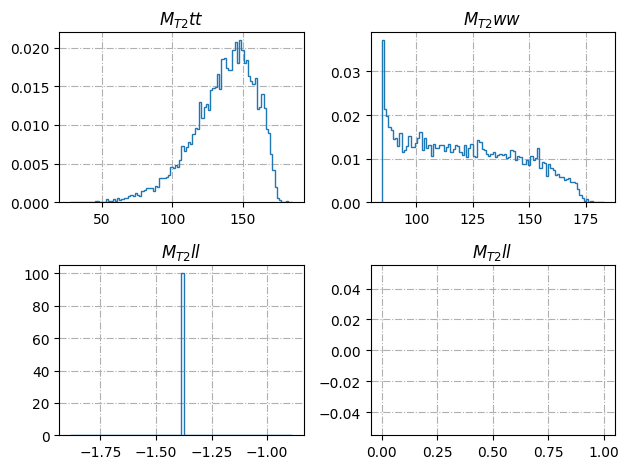

In [16]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(mt2_tt, bins=100, histtype='step', density=True)
ax[0,0].grid(True, linestyle='-.')
ax[0,0].set_title('$M_{T2} tt$')

ax[0,1].hist(mt2_ww, bins=100, histtype='step', density=True)
ax[0,1].grid(True, linestyle='-.')
ax[0,1].set_title('$M_{T2} ww$')

ax[1,0].hist(mt2_ll, bins=100, histtype='step', density=True)
ax[1,0].grid(True, linestyle='-.')
ax[1,0].set_title('$M_{T2} ll$')

ax[1,1].hist(mt2_ll[mt2_ll>1], bins=100, histtype='step', density=True)
ax[1,1].grid(True, linestyle='-.')
ax[1,1].set_title('$M_{T2} ll$')

fig.tight_layout()
plt.show()

In [17]:
mt2_tt_w = mt2( mass_numpy(b1+l2), b1[:,0]+l2[:,0], b1[:,1]+l2[:,1],
              mass_numpy(b2+l1), b2[:,0]+l1[:,0], b2[:,1]+l1[:,1],
              nu1[:,0]+nu2[:,0], nu1[:,1]+nu2[:,1],
              0, 0)

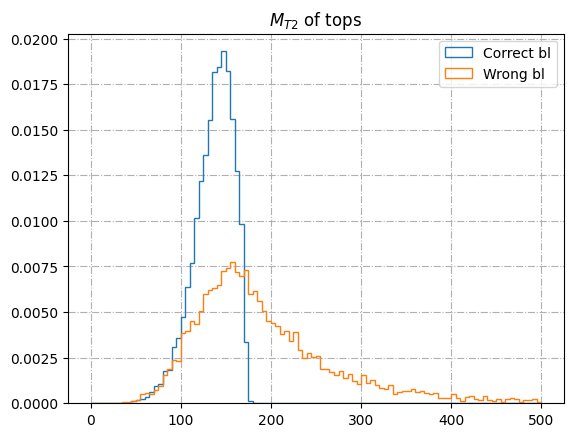

In [18]:
fig, ax = plt.subplots()
ax.hist(mt2_tt, bins=100, histtype='step', density=True, range=[0,500], label='Correct bl')
ax.hist(mt2_tt_w, bins=100, histtype='step', density=True, range=[0,500], label='Wrong bl')
ax.grid(True, linestyle='-.')
ax.set_title('$M_{T2}$ of tops')
ax.legend()
plt.show()